**Indoor Object Detection**

author: David Durán

version: 1.0

date: 01/2023


---



---



This document contains the implementation of an object detection algorithm for indoor scenes using the [Indoor Object Detection dataset](https://zenodo.org/record/2654485#.Y8lWzBXMJD9).

The process described herein includes the preparation of the working environment, the training and validation process as well as the evaluation of the models and their inference analysis.

Index:




1. [Environment preparation](#1)
2. [Required files download](#2)
3. [Dataset and annotation visualization](#3)
4. [Training process](#4)
5. [Inference mode setting](#5)
6. [Evaluation process](#6)
7. [Model inference assessment](#7)



<a name="1"></a>
# 1. Environment preparation

This section prepares the Google Colab environment for the forecoming steps. Required packages and proper versions are installed.

Import drive, mount to Google Colab and set the working directory to the project folder `DATsystem-YOLO-tf24`.

In [ ]:
# Mount Google Colab drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/

/content/drive/MyDrive/IndoorObjectDetection


The **YOLO** architecture has been chosen for the object detection algorithm. The `keras-YOLOv3-model-set` implementation is utilized (source: [Github](https://github.com/david8862/keras-YOLOv3-model-set#tensorflow-model-convert)).

Clone the repository and change directory to `keras-YOLOv3-model-set`.

In [ ]:
!git clone https://github.com/david8862/keras-YOLOv3-model-set

In [ ]:
%cd ./keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


Install package dependencies. Notice some installations may require to restart the runtime. Run cells sequentially and restart runtime as necessary.

In [ ]:
!apt install python3-opencv imagemagick numpy==1.21.0 scikit-learn==1.0.0 folium==0.2.1 imgaug==0.2.5 h5py==2.10.0
!pip install Cython
!pip install -r requirements.txt

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package numpy=
E: Unable to locate package scikit-learn=
E: Unable to locate package folium=
E: Unable to locate package imgaug=
E: Unable to locate package h5py=
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.7/172.7 KB 22.9 MB/s eta 0:00:

TensorFlow version 2.4 is required for a successful training, model conversion and inference. Use this version for all steps in the pipeline as some steps may raise errors or exceptions with a different version.

In [ ]:
!pip install tensorflow==2.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.8/394.8 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 46.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.0/462.0 KB 40.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 39.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4849 sha256=53292f02a9d85156cada09b6f5f8c3e31bec6c7f560c9e13b3d2a87ef05a1ce4
  Stored in directory: /root/.cache/pip/wheels/a0/16/9c/5473df82468f958445479c59e784896fa24f4a5fc024b0f501
  Created wheel for wrapt: filename=wrapt-1.12.1-cp38-cp38-linux_x86_64.whl

Check TF v2.4 is imported correctly.

In [ ]:
import tensorflow
print(tensorflow.__version__) 

2.4.0


In [ ]:
!pip install --upgrade tensorflow-model-optimization

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.9/238.9 KB 12.8 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-model-optimization
    Found existing installation: tensorflow-model-optimization 0.5.0
    Uninstalling tensorflow-model-optimization-0.5.0:
      Successfully uninstalled tensorflow-model-optimization-0.5.0


In [ ]:
!pip install mnn==1.1.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 5.2 MB/s eta 0:00:00
  Attempting uninstall: mnn
    Found existing installation: MNN 2.3.0
    Uninstalling MNN-2.3.0:
      Successfully uninstalled MNN-2.3.0


In [ ]:
!pip install keras_applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# imports
import cv2
import matplotlib.pyplot as plt
import random
import os
import csv
import xml.etree.ElementTree as ET
import math
from PIL import Image
import copy
import time
import tensorflow as tf
from tensorflow.keras.models import load_model
import tensorflow.keras.backend as K
from tensorflow.keras.layers import ReLU, Activation, Multiply

<a name="2"></a>
# 2. Required files download

## 2.1 Files Download

Since transfer learning is considered for training the NN, the weights of the pre-trained used model are required. Commands to download the weights for all available YOLO architectures withing `keras-YOLOv3-model-set` packpage are shown in this section. The model architecture of interest for this project is `yolo3` and `yolo3-tiny`. Remaining commands are commented out.

Download Related Darknet/YOLOv2/v3/v4 weights.

In [ ]:
#!wget -O weights/darknet53.conv.74.weights https://pjreddie.com/media/files/darknet53.conv.74
#!wget -O weights/darknet19_448.conv.23.weights https://pjreddie.com/media/files/darknet19_448.conv.23
!wget -O weights/yolov3.weights https://pjreddie.com/media/files/yolov3.weights
!wget -O weights/yolov3-tiny.weights https://pjreddie.com/media/files/yolov3-tiny.weights
#!wget -O weights/yolov3-spp.weights https://pjreddie.com/media/files/yolov3-spp.weights
#!wget -O weights/yolov2.weights http://pjreddie.com/media/files/yolo.weights
#!wget -O weights/yolov2-voc.weights http://pjreddie.com/media/files/yolo-voc.weights
#!wget -O weights/yolov2-tiny.weights https://pjreddie.com/media/files/yolov2-tiny.weights
#!wget -O weights/yolov2-tiny-voc.weights https://pjreddie.com/media/files/yolov2-tiny-voc.weights

### manually download csdarknet53-omega_final.weights from https://drive.google.com/open?id=18jCwaL4SJ-jOvXrZNGHJ5yz44g9zi8Hm
#!wget -O weights/yolov4.weights https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights

!python tools/model_converter/convert.py cfg/yolov3.cfg weights/yolov3.weights weights/yolov3.h5
!python tools/model_converter/convert.py cfg/yolov3-tiny.cfg weights/yolov3-tiny.weights weights/yolov3-tiny.h5
#!python tools/model_converter/convert.py cfg/yolov3-spp.cfg weights/yolov3-spp.weights weights/yolov3-spp.h5
#!python tools/model_converter/convert.py cfg/yolov2.cfg weights/yolov2.weights weights/yolov2.h5
#!python tools/model_converter/convert.py cfg/yolov2-voc.cfg weights/yolov2-voc.weights weights/yolov2-voc.h5
#!python tools/model_converter/convert.py cfg/yolov2-tiny.cfg weights/yolov2-tiny.weights weights/yolov2-tiny.h5
#!python tools/model_converter/convert.py cfg/yolov2-tiny-voc.cfg weights/yolov2-tiny-voc.weights weights/yolov2-tiny-voc.h5
#!python tools/model_converter/convert.py cfg/darknet53.cfg weights/darknet53.conv.74.weights weights/darknet53.h5
#!python tools/model_converter/convert.py cfg/darknet19_448_body.cfg weights/darknet19_448.conv.23.weights weights/darknet19.h5

#!python tools/model_converter/convert.py cfg/csdarknet53-omega.cfg weights/csdarknet53-omega_final.weights weights/cspdarknet53.h5

### make sure to reorder output tensors for YOLOv4 cfg and weights file
#!python tools/model_converter/convert.py --yolo4_reorder cfg/yolov4.cfg weights/yolov4.weights weights/yolov4.h5

### Scaled YOLOv4
### manually download yolov4-csp.weights from https://drive.google.com/file/d/1NQwz47cW0NUgy7L3_xOKaNEfLoQuq3EL/view?usp=sharing
#!python tools/model_converter/convert.py --yolo4_reorder cfg/yolov4-csp_fixed.cfg weights/yolov4-csp.weights weights/scaled-yolov4-csp.h5

### Yolo-Fastest
#!wget -O weights/yolo-fastest.weights https://github.com/dog-qiuqiu/Yolo-Fastest/raw/master/ModelZoo/yolo-fastest-1.0_coco/yolo-fastest.weights
#!wget -O weights/yolo-fastest-xl.weights https://github.com/dog-qiuqiu/Yolo-Fastest/raw/master/ModelZoo/yolo-fastest-1.0_coco/yolo-fastest-xl.weights

#!python tools/model_converter/convert.py cfg/yolo-fastest.cfg weights/yolo-fastest.weights weights/yolo-fastest.h5
#!python tools/model_converter/convert.py cfg/yolo-fastest-xl.cfg weights/yolo-fastest-xl.weights weights/yolo-fastest-xl.h5


#!python yolo.py --image
#!python yolo.py --input=<your video file>

## 2.2 Folder Structure and required files

After `keras-yolov3-model-set` repository has been cloned the resulting `drive` folder structure should be similar to the following simplified one.



```
.
└── MyDrive
	├── IndoorObjectDetection
    │   ├── data
    │   │   └── annotations
    │   │   └── sequence_1
    │   │   └── sequence_2
    │   │   └── sequence_3
    │   │   └── sequence_4
    │   │   └── sequence_5
    │   │   └── sequence_6
    │   │   └── annotations.txt
    │   │   └── train.txt
    │   │   └── valid.txt
    │   │   └── classes.txt
    │   ├── keras-YOLOv3-model-set
    │   │   ├── assets
    │   │   ├── cfg
    │   │   ├── common
    │   │   ├── configs
    │   │   │   ├── coco2017_origin_classes.txt
    │   │   │   ├── coco_classes.txt
    │   │   │   ├── objects365_classes.txt
    │   │   │   ├── scaled-yolo4-csp_anchors.txt -> yolo4_anchors.txt
    │   │   │   ├── tiny_yolo3_anchors.txt
    │   │   │   ├── VOC2012_person_test.txt
    │   │   │   ├── voc_classes.txt
    │   │   │   ├── yolo2_anchors.txt
    │   │   │   ├── yolo2-tiny_anchors.txt
    │   │   │   ├── yolo2-tiny-voc_anchors.txt
    │   │   │   ├── yolo2-voc_anchors.txt
    │   │   │   ├── yolo3_anchors.txt
    │   │   │   ├── yolo4_anchors.txt
    │   │   │   ├── yolo5_anchors.txt -> yolo3_anchors.txt
    │   │   │   └── yolo_fastest_anchors.txt
    │   │   ├── Dockerfile
    │   │   ├── eval.py
    │   │   ├── example
    │   │   ├── inference
    │   │   ├── LICENSE
    │   │   ├── logs
    │   │   │   └── 000
    │   │   ├── README.md
    │   │   ├── requirements.txt
    │   │   ├── result
    │   │   ├── scaled_yolo4
    │   │   ├── tools
    │   │   │   ├── dataset_converter
    │   │   │   ├── evaluation
    │   │   │   ├── misc
    │   │   │   └── model_converter
    │   │   ├── tracking
    │   │   ├── train.py
    │   │   ├── weights
    │   │   ├── yolo2
    │   │   ├── yolo3
    │   │   ├── yolo4
    │   │   ├── yolo5
    │   │   └── yolo.py
    │   └── output_models
	└──
```



Notice that the following files and directories must be added/created:


* `data/clases.txt`: file containing classes' labels
* `data/train.txt`: file containing the images path and annotations for training of the model (see [section 4](#4))
* `data/valid.txt`: file containing the images path and annotations for validation of the model
* `./data` directory to store image dataset
* `./output` directory to store trained models 



<a name="3"></a>
# 3. Dataset and annotation visualization

## 3.0 Dataset Preparation

The Indoor Object Detection dataset provides the annotations in VOC format. YOLO architecture requires an annotation file input which follows the format:

```
image1_path x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
image2_path x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
...
```

In order to create the annotations file in the required format, the annotations must be process with the following function:

In [ ]:
def VOCtoCSV(dataset_dir, annotation_dir):
  """
  Convert PASCAL VOC annotations to a CSV file format.
  Args:
  dataset_dir : str : directory path where dataset is present
  annotation_dir : str : directory path where annotations are present
  Returns:
  None

  Outputs:
  annotations.txt : CSV file with following format:
                    dataset_dir/subfolder/image_filename x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
  classes.txt : List of all the classes in the annotations
  """
  # open a CSV file to write the data to
  with open(os.path.join(dataset_dir, 'annotations.txt'), 'w', newline='') as f:
      writer = csv.writer(f, delimiter=" ", escapechar=',')
      # write the header row to the CSV file
      #writer.writerow(['image_name', 'xmin', 'ymin', 'xmax', 'ymax', 'class'])

      labels = []

      # iterate through the subfolders in the dataset directory
      for subfolder in os.listdir(dataset_dir):
          if subfolder.startswith('sequence_'):
              # Extract the sequence number from the subfolder name
              sequence_num = subfolder.split('_')[1]
              # Load the corresponding XML file from the annotation folder
              xml_file = os.path.join(annotation_dir, 'annotation_s{}.xml'.format(sequence_num))
              tree = ET.parse(xml_file)
              root = tree.getroot()
              for image in root.findall('images/image'):
                image_filename = image.attrib.get('file')
                # Find all the box elements in the XML file
                boxes = []
                for box in image.findall(f'box'):
                    # Extract the class label
                    class_label = box.find('label').text
                    if class_label not in labels:
                      labels.append(class_label)
                    
                    # Extract the bounding box coordinates
                    xmin = box.attrib.get('left')
                    ymin = box.attrib.get('top')
                    xmax = int(xmin) + int(box.attrib.get('width'))
                    ymax = int(ymin) + int(box.attrib.get('height'))
                    boxes.append(','.join([str(xmin), str(ymin), str(xmax), str(ymax), str(labels.index(class_label))]))
                # Write the data to a row in the CSV file
                #writer.writerow([dataset_dir+'/'+subfolder+'/'+image_filename, str(' '.join(boxes))])
                f.write(' '.join([dataset_dir+'/'+subfolder+'/'+image_filename, str(' '.join(boxes))]) + '\n')
      
      with open(os.path.join(dataset_dir, 'classes.txt'), 'w') as l:
        for label in labels:
          l.write(label+'\n')

In [ ]:
# path to dataset directory and the annotation folder
dataset_dir = '/content/drive/MyDrive/IndoorObjectDetection/data'
annotation_dir = '/content/drive/MyDrive/IndoorObjectDetection/data/annotation'

VOCtoCSV(dataset_dir, annotation_dir)

In order to visualize the dataset images and their annotations (i.e. bounding boxes), the dataset visualization tool from `keras-YOLOv3-model-set` package may be used. Notice that this tool should open a window to show the image. This is not possible when working with Google Colab.

Alternatively, the following snippet may be used when working with Google Colab. The code loads the image given from the `image_path` and display it with the annotation boxes provided with the `boxes_list`.

In [ ]:
def plot_show_image_with_boxes(image_path, boxes_list):
  """
  Plot and display an image with bounding boxes.
  Args:
  image_path : str : path to the image
  boxes_list : List[str] : List of strings with each string containing bounding box coordinates in the format 'xmin,ymin,xmax,ymax,classid'
  Returns:
  None
  Outputs:
  Image is displayed with bounding boxes drawn on it
  """
  # read image
  image = cv2.imread(image_path)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

  # plot boxes
  for i in range(len(boxes_list)):
    xmin, ymin, xmax, ymax, classid = boxes_list[i].split(',')
    image = cv2.rectangle(image,(int(xmin),int(ymin)),(int(xmax),int(ymax)),(255,0,0), 5)
  
  plt.imshow(image)
  plt.show()

This is an example of an image ploted with the ground truth annotations.

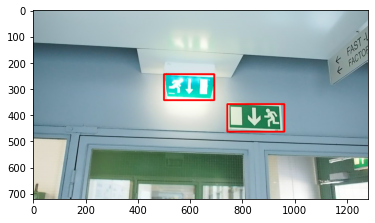

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/IndoorObjectDetection/data/sequence_1/frame_s1_1.jpg'
ANNOTATIONS_PATH = '/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt'

with open(ANNOTATIONS_PATH) as f:
  lines = f.readlines()
 
  for line in lines:

    line = line.split(' ')

    if line[0] == IMAGE_PATH:
      plot_show_image_with_boxes(image_path=line[0], 
                                 boxes_list=line[1:])

In [ ]:
class_counts = {}

with open('/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt', 'r') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        for box in row[1:]:
            class_id = box.split(',')[-1]
            if class_id in class_counts:
                class_counts[class_id] += 1
            else:
                class_counts[class_id] = 1

print(class_counts)


{'0': 545, '1': 1684, '2': 1662, '3': 280, '4': 228, '5': 81, '6': 115, '': 6}


The dataset is heavily imbalance for some classes as shown above. This could lead to low performance of an object detection model trained under this scenario. The detection rate of the majority classes will probably be higher than the underrepresented classes. To avoid this, data augmentation techniques could be explored.

For the sake of providing a functional object detection model, we will continue without an augmented dataset knowing the performance could result being lower than desired.

## 3.1 Training and Validation Sets

For the purpose of training the model subsets of training and validation must be created from the dataset. Images and their annotations are randomly split 80/20 in `train.txt` and `valid.txt` files.

In [ ]:
def train_valid_split(file_path, output_path, split_percentage=0.8, shuffle_flag=True):
  """
  Split a file into train and validation sets.
  Args:
  file_path : str : path to the file that needs to be split
  output_path : str : path to the directory where the train and validation files will be saved
  split_percentage : float : percentage of data to be used for training, default value is 0.8
  shuffle_flag : bool : flag to shuffle the data before splitting, default value is True
  Returns:
  None
  Outputs:
  train.txt : file containing training data
  valid.txt : file containing validation data
  """
  with open(file_path, 'r') as f:
      lines = f.readlines()
  if shuffle_flag:
      random.shuffle(lines)
  split_index = int(len(lines) * split_percentage)
  train_lines = lines[:split_index]
  valid_lines = lines[split_index:]
  with open(f'{output_path}/train.txt', 'w') as f:
      f.writelines(train_lines)
  with open(f'{output_path}/valid.txt', 'w') as f:
      f.writelines(valid_lines)


In [ ]:
train_valid_split('/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt',
                  '/content/drive/MyDrive/IndoorObjectDetection/data',
                  0.8, True)

<a name="4"></a>
# 4. Training process

This section includes the training process of the object detection algorithm. Different YOLO architectures are trained in order to find a trade-off between model size and performance.

Considered model types are:


1. [yolo3_mobilenet_lite](#4.1)
2. [tiny_yolo3_mobilenet](#4.2)
3. [tiny_yolo3_mobilenetv3small_lite](#4.3)



The models are trained with the following considerations:


* Initial model image input shape is 416x416
* Batch size for train is 16
* Optimizer is Adam
* Initial learning rate is 1e-3
* Transfer training (from Imagenet) for 20 epochs
* Total training epochs are 250
* Evaluation  with an interval of 10 iteration(epochs)
* ReduceLearningOnPlateau: learning rate is reduced with a ratio of 0.5 if validation loss does not improve after 10 epochs
* EarlyStopping: training ends if validation loss does not improve after 50 epochs
* Validation loss is monitored to store best model





For training, `train.py` script is run. Arguments are the model type, the anchors for the bounding boxes, the annotation file, the class file and whether the evaluation is done and stored.

The annotation file contains the image path and its annotations. Each row refers to one image and its format is as follows:



```
image1_path x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
image2_path x1_min,y1_min,x1_max,y1_max,class_id1 x2_min,y2_min,x2_max,y2_max,class_id2 ...
...
```

The class file contains the class label as follows:



```
exit
fireextinguisher
chair
clock
trashbin
printer
screen
```





## 4.0 Pre-training

Change to `keras-YOLOv3-model-set` directory.

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


Execute this line to avoid `DNN module not found` error during training and evaluation.

In [ ]:
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be DOWNGRADED:
  libcudnn8
0 upgraded, 0 newly installed, 1 downgraded, 1 to remove and 21 not upgraded.
Need to get 430 MB of archives.
After this operation, 1,392 MB disk space will be freed.
Get:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  libcudnn8 8.1.0.77-1+cuda11.2 [430 MB]
Fetched 430 MB in 7s (63.9 MB/s)
(Reading database ... 129504 files and directories currently installed.)
Removing libcudnn8-dev (8.1.1.33-1+cuda11.2) ...
update-alternatives: removing manually selected alternative - switching libcudnn to auto mode
dpkg: warning: downgrading libcudnn8 from 8.1.1.33-1+cuda11.2 to 8.1.0.77-1+cuda11.2
(Reading database ... 129481 files and directories currently installed.)
Preparing to unpack .../libcudnn8_8.1.0.7

<a name="4.1"></a>
## 4.1 Model type: `yolo3_mobilenet_lite`

Change directory to `keras-YOLOv3-model-set` and run `train.py` script.

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

!python train.py --model_type=yolo3_mobilenet_lite \
--anchors_path=configs/yolo3_anchors.txt \
--annotation_file=/content/drive/MyDrive/IndoorObjectDetection/data/train.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--eval_online \
--save_eval_checkpoint

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set
2023-01-20 07:32:30.483683: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
ImportError: numpy.core.multiarray failed to import

The above exception was the direct cause of the following exception:

SystemError: <built-in function __import__> returned a result with an error set
2023-01-20 07:33:12.963462: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-20 07:33:12.966056: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-20 07:33:13.585334: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero

Copy final model to `output_models` directory for later use.

In [ ]:
!mkdir /content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite

mkdir: cannot create directory ‘/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite’: File exists


In [ ]:
!cp /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/logs/000/ep020-loss7.758-val_loss7.674-mAP62.063.h5 \
/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/trained_final.h5

cp: cannot stat '/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/logs/000//content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/logs/000/ep020-loss7.758-val_loss7.674-mAP62.063.h5': No such file or directory


<a name="5"></a>
# 5. Inference mode setting

After training, the model needs to be set to inference mode in order to be used for prediction. `yolo.py` script is run to perform the inference mode setting. Arguments are the model type, the trained model path, the anchors for the bounding boxes, the class file, the model's input shape and whether the inference model should be stored and its output location.

Change directory to `keras-YOLOv3-model-set` and run `yolo.py`.

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


## 5.1 Model type: `yolo3_mobilenet_lite`

In [ ]:
!python yolo.py \
--model_type=yolo3_mobilenet_lite \
--weights_path=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/trained_final.h5 \
--anchors_path=configs/yolo3_anchors.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--model_input_shape=416x416 \
--dump_model \
--output_model_file=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5

2023-01-21 10:14:18.332024: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2023-01-21 10:15:13.617495: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-21 10:15:13.620004: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-21 10:15:14.269501: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 10:15:14.270217: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.75GiB deviceMemoryBandwidth: 298.08GiB/s
2023-01-21 10:15:14.270285: I tensorflow/stream_executor/platform/default/dso_loade

<a name="6"></a>
# 6. Evaluation process

After training and inference mode setting, the model format will be TensorFlow (file extension *.h5). From this point, the model may be used for inference. `eval.py` script is run to evaluate the performance of the model on the validation set. Arguments are the trained model location, the anchors for the bounding boxes, the class file, the model input shape, the annotation format, the IOU threshold, the confidence threshold, the validation set file and whether to save the results.

The annotation format refers to the output file created during the evaluation. Each row represents the output image path, the bounding box/es coordinates, the class label id and the prediction confidence. The results are formated as follows:



```
prediction1_path x1_min,y1_min,x1_max,y1_max,class_id1,confidence1 x2_min,y2_min,x2_max,y2_max,class_id2,confidence2 ...
prediction2_path x1_min,y1_min,x1_max,y1_max,class_id1,confidence1 x2_min,y2_min,x2_max,y2_max,class_id2,confidence2 ...
...
```

The **Intersection Over Union** (IoU) is utilized for measuring the performance during the training as well as for the validation process. IoU indicates the overlap of the predicted bounding box coordinates to the ground truth box. Higher IoU indicates the predicted bounding box coordinates closely resembles the ground truth box coordinates.

IoU varies from 0 to 1, hence the higher the value the closer the prediction matches the annotation. The IOU threshold serves to set the overlap limit above which the prediction is considered a match. The confidence threshold represents the prediction confidence limit below which the prediction will be discarded.

As a result of the evaluation process, a **Mean Average Precision** (mAP)  value is obtained. In object detection problems, precision is interpreted as IoU. This metric is calculated for different IoU thresholds and averaged for each class. Afterwards, the mean of each AP is obtained.

The evaluation results have the following format:



```
Pascal VOC AP evaluation
island: AP 0.7041, precision 0.8722, recall 0.7342
mAP@IoU=0.50 result: 70.412659
mPrec@IoU=0.50 result: 87.218045
mRec@IoU=0.50 result: 73.417722
Evaluation time cost: 128.772611s
```





Change directory to `keras-YOLOv3-model-set` and tun `eval.py` script.

In [ ]:
!pwd

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


## 6.1 Model type: `yolo3_mobilenet_lite`

In [ ]:
!pip install onnxruntime
!pip uninstall numpy
!pip install numpy==1.19.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.24.1-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.4.0 requires numpy~=1.19.2, but you have numpy 1.24.1 which is incompatible.
scipy 1.7.3 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.1 which is incompatible.
Found existing installation: numpy 1.24.1
Uninstalling numpy-1.24.1:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.8
    /usr/local/lib/python3.8/dist-packages/numpy-1.24.1.dist-info/*
    /usr/local/lib/python3.8/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.8/dist-packages/nu

In [ ]:
!python eval.py \
--model_path=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5 \
--anchors_path=configs/yolo3_anchors.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--model_input_shape=416x416 \
--eval_type=VOC \
--iou_threshold=0.5 \
--conf_threshold=0.3 \
--annotation_file=/content/drive/MyDrive/IndoorObjectDetection/data/valid.txt \
--save_result

2023-01-21 10:20:34.405995: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
ImportError: numpy.core.multiarray failed to import

The above exception was the direct cause of the following exception:

SystemError: <built-in function __import__> returned a result with an error set
2023-01-21 10:20:37.577955: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-21 10:20:37.579381: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-21 10:20:38.328358: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-21 10:20:38.329420: I tensorflow/core/common_runtime/gpu/gp

<a name="8"></a>
# 7. Model inference assessment

## 7.0 Utils

The following helper functions are taken from the `keras-YOLO3-model-set` package. They are used for inference with TF and TFLite models.

In [ ]:
def load_eval_model(model_path):
    # support of tflite model
    if model_path.endswith('.tflite'):
        from tensorflow.lite.python import interpreter as interpreter_wrapper
        model = interpreter_wrapper.Interpreter(model_path=model_path)
        model.allocate_tensors()
        model_format = 'TFLITE'

    # normal keras h5 model
    elif model_path.endswith('.h5'):
        custom_object_dict = get_custom_objects()

        model = load_model(model_path, compile=False, custom_objects=custom_object_dict)
        model_format = 'H5'
        K.set_learning_phase(0)
    else:
        raise ValueError('invalid model file')

    return model, model_format

def get_custom_objects():
    '''
    form up a custom_objects dict so that the customized
    layer/function call could be correctly parsed when keras
    .h5 model is loading or converting
    '''
    custom_objects_dict = {
        'tf': tf,
        'swish': swish,
        'hard_sigmoid': hard_sigmoid,
        'hard_swish': hard_swish,
        'mish': mish
    }

    return custom_objects_dict

def swish(x):
    """Swish activation function.
    # Arguments
        x: Input tensor.
    # Returns
        The Swish activation: `x * sigmoid(x)`.
    # References
        [Searching for Activation Functions](https://arxiv.org/abs/1710.05941)
    """
    if K.backend() == 'tensorflow':
        try:
            # The native TF implementation has a more
            # memory-efficient gradient implementation
            return K.tf.nn.swish(x)
        except AttributeError:
            pass

    return x * K.sigmoid(x)

def hard_sigmoid(x):
    return ReLU(6.)(x + 3.) * (1. / 6.)

def hard_swish(x):
    return Multiply()([Activation(hard_sigmoid)(x), x])

def mish(x):
    return x * K.tanh(K.softplus(x))


In [ ]:
def yolo_predict_tflite(interpreter, image, anchors, num_classes, conf_threshold):#, elim_grid_sense, v5_decode):
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()

    #print("input/output details:")
    #print(input_details)
    #print(output_details)

    # check the type of the input tensor
    #if input_details[0]['dtype'] == np.float32:
        #floating_model = True

    height = input_details[0]['shape'][1]
    width = input_details[0]['shape'][2]
    model_input_shape = (height, width)

    image_data = preprocess_image(image, model_input_shape)
    #origin image shape, in (height, width) format
    image_shape = image.size[::-1]
    #print(f"image shape: {image_shape}")

    interpreter.set_tensor(input_details[0]['index'], image_data)
    start = time.time()
    interpreter.invoke()
    print('Time for inference:',time.time()-start)

    prediction = []
    for output_detail in output_details:
        output_data = interpreter.get_tensor(output_detail['index'])
        prediction.append(output_data)
        #print(f"output data: {output_data}")

    #if len(anchors) == 5:
    #    # YOLOv2 use 5 anchors and have only 1 prediction
    #    assert len(prediction) == 1, 'invalid YOLOv2 prediction number.'
    #    pred_boxes, pred_classes, pred_scores = yolo2_postprocess_np(prediction[0], image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)
    #else:
    #    if v5_decode:
    #        pred_boxes, pred_classes, pred_scores = yolo5_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=True) #enable "elim_grid_sense" by default
    #    else:
    #        pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)
    start = time.time()
    pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold)#, elim_grid_sense=elim_grid_sense)
    print('Time to postprocess prediction',time.time()-start)

    return pred_boxes, pred_classes, pred_scores

`scipy.special.expit` (sigmoid function) is replace with a `numpy` implementation:

In [ ]:
import numpy as np

def expit(x):
  
    z = np.exp(-x)
    sig = 1 / (1 + z)

    return sig

In [ ]:
#from scipy.special import expit

def preprocess_image(image, model_input_shape):
    """
    Prepare model input image data with letterbox
    resize, normalize and dim expansion
    # Arguments
        image: origin input image
            PIL Image object containing image data
        model_input_shape: model input image shape
            tuple of format (height, width).
    # Returns
        image_data: numpy array of image data for model input.
    """
    #resized_image = cv2.resize(image, model_input_shape[::-1], cv2.INTER_AREA)
    resized_image = letterbox_resize(image, model_input_shape[::-1])
    image_data = np.asarray(resized_image).astype('float32')
    image_data = normalize_image(image_data)
    image_data = np.expand_dims(image_data, 0)  # Add batch dimension.
    return image_data

def letterbox_resize(image, target_size, return_padding_info=False):
    """
    Resize image with unchanged aspect ratio using padding
    # Arguments
        image: origin image to be resize
            PIL Image object containing image data
        target_size: target image size,
            tuple of format (width, height).
        return_padding_info: whether to return padding size & offset info
            Boolean flag to control return value
    # Returns
        new_image: resized PIL Image object.
        padding_size: padding image size (keep aspect ratio).
            will be used to reshape the ground truth bounding box
        offset: top-left offset in target image padding.
            will be used to reshape the ground truth bounding box
    """
    src_w, src_h = image.size
    target_w, target_h = target_size

    # calculate padding scale and padding offset
    scale = min(target_w/src_w, target_h/src_h)
    padding_w = int(src_w * scale)
    padding_h = int(src_h * scale)
    padding_size = (padding_w, padding_h)

    dx = (target_w - padding_w)//2
    dy = (target_h - padding_h)//2
    offset = (dx, dy)

    # create letterbox resized image
    image = image.resize(padding_size, Image.BICUBIC)
    new_image = Image.new('RGB', target_size, (128,128,128))
    new_image.paste(image, offset)

    if return_padding_info:
        return new_image, padding_size, offset
    else:
        return new_image

def normalize_image(image):
    """
    normalize image array from 0 ~ 255
    to 0.0 ~ 1.0
    # Arguments
        image: origin input image
            numpy image array with dtype=float, 0.0 ~ 255.0
    # Returns
        image: numpy image array with dtype=float, 0.0 ~ 1.0
    """
    image = image.astype(np.float32) / 255.0

    return image

def yolo3_postprocess_np(yolo_outputs, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=0.1, iou_threshold=0.4, elim_grid_sense=False):
    # here we sort the prediction tensor list with grid size (e.g. 19/38/76)
    # to make sure it matches with anchors order
    yolo_outputs.sort(key=lambda x: x.shape[1])
    #print(f"yolo outputs sorted: {yolo_outputs}")

    #print(f"anchors: {anchors}")

    predictions = yolo3_decode(yolo_outputs, anchors, num_classes, input_shape=model_input_shape, elim_grid_sense=elim_grid_sense)
    #print(predictions)
    predictions = yolo_correct_boxes(predictions, image_shape, model_input_shape)
    #print(predictions)

    boxes, classes, scores = yolo_handle_predictions(predictions,
                                                     image_shape,
                                                     num_classes,
                                                     max_boxes=max_boxes,
                                                     confidence=confidence,
                                                     iou_threshold=iou_threshold)

    print(classes, scores)

    boxes = yolo_adjust_boxes(boxes, image_shape)
    print(boxes)

    return boxes, classes, scores

def yolo3_decode(predictions, anchors, num_classes, input_shape, elim_grid_sense=False):
    """
    YOLOv3 Head to process predictions from YOLOv3 models
    :param num_classes: Total number of classes
    :param anchors: YOLO style anchor list for bounding box assignment
    :param input_shape: Input shape of the image
    :param predictions: A list of three tensors with shape (N, 19, 19, 255), (N, 38, 38, 255) and (N, 76, 76, 255)
    :return: A tensor with the shape (N, num_boxes, 85)
    """
    print(f"predictions length: {len(predictions)}, anchors length: {len(anchors)//3}")
    assert len(predictions) == len(anchors)//3, 'anchor numbers does not match prediction.'

    if len(predictions) == 3: # assume 3 set of predictions is YOLOv3
        anchor_mask = [[6,7,8], [3,4,5], [0,1,2]]
        scale_x_y = [1.05, 1.1, 1.2] if elim_grid_sense else [None, None, None]
    elif len(predictions) == 2: # 2 set of predictions is YOLOv3-tiny
        anchor_mask = [[3,4,5], [0,1,2]]
        scale_x_y = [1.05, 1.05] if elim_grid_sense else [None, None]
    else:
        raise ValueError('Unsupported prediction length: {}'.format(len(predictions)))

    results = []
    for i, prediction in enumerate(predictions):
        results.append(yolo_decode(prediction, anchors[anchor_mask[i]], num_classes, input_shape, scale_x_y=scale_x_y[i], use_softmax=False))

    return np.concatenate(results, axis=1)

def yolo_decode(prediction, anchors, num_classes, input_shape, scale_x_y=None, use_softmax=False):
    '''Decode final layer features to bounding box parameters.'''
    batch_size = np.shape(prediction)[0]
    num_anchors = len(anchors)

    grid_shape = np.shape(prediction)[1:3]
    #check if stride on height & width are same
    assert input_shape[0]//grid_shape[0] == input_shape[1]//grid_shape[1], 'model stride mismatch.'
    stride = input_shape[0] // grid_shape[0]

    prediction = np.reshape(prediction,
                            (batch_size, grid_shape[0] * grid_shape[1] * num_anchors, num_classes + 5))

    ################################
    # generate x_y_offset grid map
    grid_y = np.arange(grid_shape[0])
    grid_x = np.arange(grid_shape[1])
    x_offset, y_offset = np.meshgrid(grid_x, grid_y)

    x_offset = np.reshape(x_offset, (-1, 1))
    y_offset = np.reshape(y_offset, (-1, 1))

    x_y_offset = np.concatenate((x_offset, y_offset), axis=1)
    x_y_offset = np.tile(x_y_offset, (1, num_anchors))
    x_y_offset = np.reshape(x_y_offset, (-1, 2))
    x_y_offset = np.expand_dims(x_y_offset, 0)

    ################################

    # Log space transform of the height and width
    anchors = np.tile(anchors, (grid_shape[0] * grid_shape[1], 1))
    anchors = np.expand_dims(anchors, 0)

    if scale_x_y:
        # Eliminate grid sensitivity trick involved in YOLOv4
        #
        # Reference Paper & code:
        #     "YOLOv4: Optimal Speed and Accuracy of Object Detection"
        #     https://arxiv.org/abs/2004.10934
        #     https://github.com/opencv/opencv/issues/17148
        #
        box_xy_tmp = expit(prediction[..., :2]) * scale_x_y - (scale_x_y - 1) / 2
        box_xy = (box_xy_tmp + x_y_offset) / np.array(grid_shape)[::-1]
    else:
        box_xy = (expit(prediction[..., :2]) + x_y_offset) / np.array(grid_shape)[::-1]
    box_wh = (np.exp(prediction[..., 2:4]) * anchors) / np.array(input_shape)[::-1]

    # Sigmoid objectness scores
    objectness = expit(prediction[..., 4])  # p_o (objectness score)
    objectness = np.expand_dims(objectness, -1)  # To make the same number of values for axis 0 and 1

    if use_softmax:
        # Softmax class scores
        class_scores = softmax(prediction[..., 5:], axis=-1)
    else:
        # Sigmoid class scores
        class_scores = expit(prediction[..., 5:])

    return np.concatenate([box_xy, box_wh, objectness, class_scores], axis=2)

def yolo_correct_boxes(predictions, img_shape, model_input_shape):
    '''rescale predicition boxes back to original image shape'''
    box_xy = predictions[..., :2]
    box_wh = predictions[..., 2:4]
    objectness = np.expand_dims(predictions[..., 4], -1)
    class_scores = predictions[..., 5:]

    # model_input_shape & image_shape should be (height, width) format
    model_input_shape = np.array(model_input_shape, dtype='float32')
    image_shape = np.array(img_shape, dtype='float32')
    height, width = image_shape

    new_shape = np.round(image_shape * np.min(model_input_shape/image_shape))
    offset = (model_input_shape-new_shape)/2./model_input_shape
    scale = model_input_shape/new_shape
    # reverse offset/scale to match (w,h) order
    offset = offset[..., ::-1]
    scale = scale[..., ::-1]

    box_xy = (box_xy - offset) * scale
    box_wh *= scale

    # Convert centoids to top left coordinates
    box_xy -= box_wh / 2

    # Scale boxes back to original image shape.
    image_wh = image_shape[..., ::-1]
    box_xy *= image_wh
    box_wh *= image_wh

    return np.concatenate([box_xy, box_wh, objectness, class_scores], axis=2)

def yolo_handle_predictions(predictions, image_shape, num_classes, max_boxes=5, confidence=0.1, iou_threshold=0.4, use_cluster_nms=False, use_wbf=False):
    boxes = predictions[:, :, :4]
    box_confidences = np.expand_dims(predictions[:, :, 4], -1)
    box_class_probs = predictions[:, :, 5:]

    # check if only 1 class for different score
    if num_classes == 1:
        box_scores = box_confidences
    else:
        box_scores = box_confidences * box_class_probs

    # filter boxes with score threshold
    box_classes = np.argmax(box_scores, axis=-1)
    box_class_scores = np.max(box_scores, axis=-1)
    pos = np.where(box_class_scores >= confidence)

    boxes = boxes[pos]
    classes = box_classes[pos]
    scores = box_class_scores[pos]

    if use_cluster_nms:
        # use Fast/Cluster NMS for boxes postprocess
        n_boxes, n_classes, n_scores = fast_cluster_nms_boxes(boxes, classes, scores, iou_threshold, confidence=confidence)
    elif use_wbf:
        # use Weighted-Boxes-Fusion for boxes postprocess
        n_boxes, n_classes, n_scores = weighted_boxes_fusion([boxes], [classes], [scores], image_shape, weights=None, iou_thr=iou_threshold)
    else:
        # Boxes, Classes and Scores returned from NMS
        n_boxes, n_classes, n_scores = nms_boxes(boxes, classes, scores, iou_threshold, confidence=confidence)

    if n_boxes:
        boxes = np.concatenate(n_boxes)
        classes = np.concatenate(n_classes).astype('int32')
        scores = np.concatenate(n_scores)
        boxes, classes, scores = filter_boxes(boxes, classes, scores, max_boxes)

        return boxes, classes, scores

def yolo_adjust_boxes(boxes, img_shape):
    '''
    change box format from (x,y,w,h) top left coordinate to
    (xmin,ymin,xmax,ymax) format
    '''
    if boxes is None or len(boxes) == 0:
        return []

    image_shape = np.array(img_shape, dtype='float32')
    height, width = image_shape

    adjusted_boxes = []
    for box in boxes:
        x, y, w, h = box

        xmin = x
        ymin = y
        xmax = x + w
        ymax = y + h

        ymin = max(0, np.floor(ymin + 0.5).astype('int32'))
        xmin = max(0, np.floor(xmin + 0.5).astype('int32'))
        ymax = min(height, np.floor(ymax + 0.5).astype('int32'))
        xmax = min(width, np.floor(xmax + 0.5).astype('int32'))
        adjusted_boxes.append([xmin,ymin,xmax,ymax])

    return np.array(adjusted_boxes,dtype=np.int32)

def filter_boxes(boxes, classes, scores, max_boxes):
    '''
    Sort the prediction boxes according to score
    and only pick top "max_boxes" ones
    '''
    # sort result according to scores
    sorted_indices = np.argsort(scores)
    sorted_indices = sorted_indices[::-1]
    nboxes = boxes[sorted_indices]
    nclasses = classes[sorted_indices]
    nscores = scores[sorted_indices]

    # only pick max_boxes
    nboxes = nboxes[:max_boxes]
    nclasses = nclasses[:max_boxes]
    nscores = nscores[:max_boxes]

    return nboxes, nclasses, nscores

def box_iou(boxes):
    """
    Calculate IoU value of 1st box with other boxes of a box array
    Parameters
    ----------
    boxes: bbox numpy array, shape=(N, 4), xywh
           x,y are top left coordinates
    Returns
    -------
    iou: numpy array, shape=(N-1,)
         IoU value of boxes[1:] with boxes[0]
    """
    # get box coordinate and area
    x = boxes[:, 0]
    y = boxes[:, 1]
    w = boxes[:, 2]
    h = boxes[:, 3]
    areas = w * h

    # check IoU
    inter_xmin = np.maximum(x[1:], x[0])
    inter_ymin = np.maximum(y[1:], y[0])
    inter_xmax = np.minimum(x[1:] + w[1:], x[0] + w[0])
    inter_ymax = np.minimum(y[1:] + h[1:], y[0] + h[0])

    inter_w = np.maximum(0.0, inter_xmax - inter_xmin + 1)
    inter_h = np.maximum(0.0, inter_ymax - inter_ymin + 1)

    inter = inter_w * inter_h
    iou = inter / (areas[1:] + areas[0] - inter)
    return iou

def box_diou(boxes):
    """
    Calculate DIoU value of 1st box with other boxes of a box array
    Reference Paper:
        "Distance-IoU Loss: Faster and Better Learning for Bounding Box Regression"
        https://arxiv.org/abs/1911.08287
    Parameters
    ----------
    boxes: bbox numpy array, shape=(N, 4), xywh
           x,y are top left coordinates
    Returns
    -------
    diou: numpy array, shape=(N-1,)
         IoU value of boxes[1:] with boxes[0]
    """
    # get box coordinate and area
    x = boxes[:, 0]
    y = boxes[:, 1]
    w = boxes[:, 2]
    h = boxes[:, 3]
    areas = w * h

    # check IoU
    inter_xmin = np.maximum(x[1:], x[0])
    inter_ymin = np.maximum(y[1:], y[0])
    inter_xmax = np.minimum(x[1:] + w[1:], x[0] + w[0])
    inter_ymax = np.minimum(y[1:] + h[1:], y[0] + h[0])

    inter_w = np.maximum(0.0, inter_xmax - inter_xmin + 1)
    inter_h = np.maximum(0.0, inter_ymax - inter_ymin + 1)

    inter = inter_w * inter_h
    iou = inter / (areas[1:] + areas[0] - inter)

    # box center distance
    x_center = x + w/2
    y_center = y + h/2
    center_distance = np.power(x_center[1:] - x_center[0], 2) + np.power(y_center[1:] - y_center[0], 2)

    # get enclosed area
    enclose_xmin = np.minimum(x[1:], x[0])
    enclose_ymin = np.minimum(y[1:], y[0])
    enclose_xmax = np.maximum(x[1:] + w[1:], x[0] + w[0])
    enclose_ymax = np.maximum(x[1:] + w[1:], x[0] + w[0])
    enclose_w = np.maximum(0.0, enclose_xmax - enclose_xmin + 1)
    enclose_h = np.maximum(0.0, enclose_ymax - enclose_ymin + 1)
    # get enclosed diagonal distance
    enclose_diagonal = np.power(enclose_w, 2) + np.power(enclose_h, 2)
    # calculate DIoU, add epsilon in denominator to avoid dividing by 0
    diou = iou - 1.0 * (center_distance) / (enclose_diagonal + np.finfo(float).eps)

    return diou

def nms_boxes(boxes, classes, scores, iou_threshold, confidence=0.1, use_diou=True, is_soft=False, use_exp=False, sigma=0.5):
    nboxes, nclasses, nscores = [], [], []
    for c in set(classes):
        # handle data for one class
        inds = np.where(classes == c)
        b = boxes[inds]
        c = classes[inds]
        s = scores[inds]

        # make a data copy to avoid breaking
        # during nms operation
        b_nms = copy.deepcopy(b)
        c_nms = copy.deepcopy(c)
        s_nms = copy.deepcopy(s)

        while len(s_nms) > 0:
            # pick the max box and store, here
            # we also use copy to persist result
            i = np.argmax(s_nms, axis=-1)
            nboxes.append(copy.deepcopy(b_nms[i]))
            nclasses.append(copy.deepcopy(c_nms[i]))
            nscores.append(copy.deepcopy(s_nms[i]))

            # swap the max line and first line
            b_nms[[i,0],:] = b_nms[[0,i],:]
            c_nms[[i,0]] = c_nms[[0,i]]
            s_nms[[i,0]] = s_nms[[0,i]]

            if use_diou:
                iou = box_diou(b_nms)
                #iou = box_diou_matrix(b_nms, b_nms)[0][1:]
            else:
                iou = box_iou(b_nms)
                #iou = box_iou_matrix(b_nms, b_nms)[0][1:]

            # drop the last line since it has been record
            b_nms = b_nms[1:]
            c_nms = c_nms[1:]
            s_nms = s_nms[1:]

            if is_soft:
                # Soft-NMS
                if use_exp:
                    # score refresh formula:
                    # score = score * exp(-(iou^2)/sigma)
                    s_nms = s_nms * np.exp(-(iou * iou) / sigma)
                else:
                    # score refresh formula:
                    # score = score * (1 - iou) if iou > threshold
                    depress_mask = np.where(iou > iou_threshold)[0]
                    s_nms[depress_mask] = s_nms[depress_mask]*(1-iou[depress_mask])
                keep_mask = np.where(s_nms >= confidence)[0]
            else:
                # normal Hard-NMS
                keep_mask = np.where(iou <= iou_threshold)[0]

            # keep needed box for next loop
            b_nms = b_nms[keep_mask]
            c_nms = c_nms[keep_mask]
            s_nms = s_nms[keep_mask]

    # reformat result for output
    nboxes = [np.array(nboxes)]
    nclasses = [np.array(nclasses)]
    nscores = [np.array(nscores)]
    return nboxes, nclasses, nscores

def get_weighted_box(boxes, conf_type='avg'):
    """
    Create weighted box for set of boxes
    :param boxes: set of boxes to fuse
    :param conf_type: type of confidence one of 'avg' or 'max'
    :return: weighted box
    """

    box = np.zeros(6, dtype=np.float32)
    conf = 0
    conf_list = []
    for b in boxes:
        box[2:] += (b[1] * b[2:])
        conf += b[1]
        conf_list.append(b[1])
    box[0] = boxes[0][0]
    if conf_type == 'avg':
        box[1] = conf / len(boxes)
    elif conf_type == 'max':
        box[1] = np.array(conf_list).max()
    box[2:] /= conf
    return box

def bb_intersection_over_union(A, B) -> float:
    xA = max(A[0], B[0])
    yA = max(A[1], B[1])
    xB = min(A[2], B[2])
    yB = min(A[3], B[3])

    # compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)

    if interArea == 0:
        return 0.0

    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = (A[2] - A[0]) * (A[3] - A[1])
    boxBArea = (B[2] - B[0]) * (B[3] - B[1])

    iou = interArea / float(boxAArea + boxBArea - interArea)
    return iou

def find_matching_box(boxes_list, new_box, match_iou):
    best_iou = match_iou
    best_index = -1
    for i in range(len(boxes_list)):
        box = boxes_list[i]
        if box[0] != new_box[0]:
            continue
        iou = bb_intersection_over_union(box[2:], new_box[2:])
        if iou > best_iou:
            best_index = i
            best_iou = iou

    return best_index, best_iou

def prefilter_boxes(boxes, scores, labels, image_shape, weights, thr):
    # Create dict with boxes stored by its label
    new_boxes = dict()
    height, width = image_shape

    for t in range(len(boxes)):

        if len(boxes[t]) != len(scores[t]):
            print('Error. Length of boxes arrays not equal to length of scores array: {} != {}'.format(len(boxes[t]), len(scores[t])))
            exit()

        if len(boxes[t]) != len(labels[t]):
            print('Error. Length of boxes arrays not equal to length of labels array: {} != {}'.format(len(boxes[t]), len(labels[t])))
            exit()

        for j in range(len(boxes[t])):
            score = scores[t][j]
            if score < thr:
                continue
            label = int(labels[t][j])
            box_part = boxes[t][j]

            # input boxes in raw (x,y,w,h) format,
            # convert to normalized (x1,y1,x2,y2)
            x1 = max(0, float(box_part[0]) / width)
            y1 = max(0, float(box_part[1]) / height)
            x2 = min(1, float(box_part[2] + box_part[0]) / width)
            y2 = min(1, float(box_part[3] + box_part[1]) / height)

            # Box data checks
            #if x2 < x1:
                #warnings.warn('X2 < X1 value in box. Swap them.')
                #x1, x2 = x2, x1
            #if y2 < y1:
                #warnings.warn('Y2 < Y1 value in box. Swap them.')
                #y1, y2 = y2, y1
            #if x1 < 0:
                #warnings.warn('X1 < 0 in box. Set it to 0.')
                #x1 = 0
            #if x1 > 1:
                #warnings.warn('X1 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
                #x1 = 1
            #if x2 < 0:
                #warnings.warn('X2 < 0 in box. Set it to 0.')
                #x2 = 0
            #if x2 > 1:
                #warnings.warn('X2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
                #x2 = 1
            #if y1 < 0:
                #warnings.warn('Y1 < 0 in box. Set it to 0.')
                #y1 = 0
            #if y1 > 1:
                #warnings.warn('Y1 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
                #y1 = 1
            #if y2 < 0:
                #warnings.warn('Y2 < 0 in box. Set it to 0.')
                #y2 = 0
            #if y2 > 1:
                #warnings.warn('Y2 > 1 in box. Set it to 1. Check that you normalize boxes in [0, 1] range.')
                #y2 = 1
            if (x2 - x1) * (y2 - y1) == 0.0:
                warnings.warn("Zero area box skipped: {}.".format(box_part))
                continue

            b = [int(label), float(score) * weights[t], x1, y1, x2, y2]
            if label not in new_boxes:
                new_boxes[label] = []
            new_boxes[label].append(b)

    # Sort each list in dict by score and transform it to numpy array
    for k in new_boxes:
        current_boxes = np.array(new_boxes[k])
        new_boxes[k] = current_boxes[current_boxes[:, 1].argsort()[::-1]]

    return new_boxes

def weighted_boxes_fusion(boxes_list, labels_list, scores_list, image_shape, weights=None, iou_thr=0.55, skip_box_thr=0.0, conf_type='avg', allows_overflow=False):
    '''
    :param boxes_list: list of boxes predictions from each model, each box is 4 numbers.
    It has 3 dimensions (models_number, model_preds, 4)
    Order of boxes: x1, y1, x2, y2. We expect float normalized coordinates [0; 1]
    :param scores_list: list of scores for each model
    :param labels_list: list of labels for each model
    :param weights: list of weights for each model. Default: None, which means weight == 1 for each model
    :param iou_thr: IoU value for boxes to be a match
    :param skip_box_thr: exclude boxes with score lower than this variable
    :param conf_type: how to calculate confidence in weighted boxes. 'avg': average value, 'max': maximum value
    :param allows_overflow: false if we want confidence score not exceed 1.0
    :return: boxes: boxes coordinates (Order of boxes: x1, y1, x2, y2).
    :return: scores: confidence scores
    :return: labels: boxes labels
    '''

    if weights is None:
        weights = np.ones(len(boxes_list))
    if len(weights) != len(boxes_list):
        print('Warning: incorrect number of weights {}. Must be: {}. Set weights equal to 1.'.format(len(weights), len(boxes_list)))
        weights = np.ones(len(boxes_list))
    weights = np.array(weights)

    if conf_type not in ['avg', 'max']:
        print('Unknown conf_type: {}. Must be "avg" or "max"'.format(conf_type))
        exit()

    image_shape = np.array(image_shape, dtype='float32')
    filtered_boxes = prefilter_boxes(boxes_list, scores_list, labels_list, image_shape, weights, skip_box_thr)
    if len(filtered_boxes) == 0:
        return np.zeros((0, 4)), np.zeros((0,)), np.zeros((0,))

    overall_boxes = []
    for label in filtered_boxes:
        boxes = filtered_boxes[label]
        new_boxes = []
        weighted_boxes = []

        # Clusterize boxes
        for j in range(0, len(boxes)):
            index, best_iou = find_matching_box(weighted_boxes, boxes[j], iou_thr)
            if index != -1:
                new_boxes[index].append(boxes[j])
                weighted_boxes[index] = get_weighted_box(new_boxes[index], conf_type)
            else:
                new_boxes.append([boxes[j].copy()])
                weighted_boxes.append(boxes[j].copy())

        # Rescale confidence based on number of models and boxes
        for i in range(len(new_boxes)):
            if not allows_overflow:
                weighted_boxes[i][1] = weighted_boxes[i][1] * min(weights.sum(), len(new_boxes[i])) / weights.sum()
            else:
                weighted_boxes[i][1] = weighted_boxes[i][1] * len(new_boxes[i]) / weights.sum()
        overall_boxes.append(np.array(weighted_boxes))

    overall_boxes = np.concatenate(overall_boxes, axis=0)
    overall_boxes = overall_boxes[overall_boxes[:, 1].argsort()[::-1]]
    boxes = overall_boxes[:, 2:]
    scores = overall_boxes[:, 1]
    labels = overall_boxes[:, 0]

    # convert boxes back to (x,y,w,h)
    boxes[..., 2:] = boxes[..., 2:] - boxes[..., :2]
    # Scale boxes back to original image shape.
    image_wh = image_shape[..., ::-1]
    boxes[..., :2] *= image_wh
    boxes[..., 2:] *= image_wh

    return [boxes], [labels], [scores]

def fast_cluster_nms_boxes(boxes, classes, scores, iou_threshold, confidence=0.1, use_cluster=True, use_diou=True, use_weighted=True, use_matrix_nms=False, use_spm=False):
    """
    Fast NMS/Cluster NMS/Matrix NMS bbox post process
    Reference Paper:
        1. "YOLACT: Real-time Instance Segmentation"
           https://arxiv.org/abs/1904.02689
        2. "Enhancing Geometric Factors in Model Learning and Inference for Object Detection and Instance Segmentation"
           https://arxiv.org/abs/2005.03572
        3. "SOLOv2: Dynamic, Faster and Stronger"
           https://arxiv.org/abs/2003.10152
        4. Blogpost on zhihu:
           https://zhuanlan.zhihu.com/p/157900024
    Parameters
    ----------
    boxes:   bbox numpy array, shape=(N, 4), xywh
             x,y are top left coordinates
    classes: bbox class index numpy array, shape=(N, 1)
    scores:  bbox score numpy array, shape=(N, 1)
    iou_threshold:
    Returns
    -------
    nboxes:   NMSed bbox numpy array, shape=(N, 4), xywh
              x,y are top left coordinates
    nclasses: NMSed bbox class index numpy array, shape=(N, 1)
    nscores:  NMSed bbox score numpy array, shape=(N, 1)
    """
    nboxes, nclasses, nscores = [], [], []
    for c in set(classes):
        # handle data for one class
        inds = np.where(classes == c)
        b = boxes[inds]
        c = classes[inds]
        s = scores[inds]

        # make a data copy to avoid breaking
        # during nms operation
        b_nms = copy.deepcopy(b)
        c_nms = copy.deepcopy(c)
        s_nms = copy.deepcopy(s)

        # ascend sort boxes according to scores
        sorted_indices = np.argsort(s_nms)
        sorted_indices = sorted_indices[::-1]
        b_nms = b_nms[sorted_indices]
        c_nms = c_nms[sorted_indices]
        s_nms = s_nms[sorted_indices]

        # number of boxes for one class
        num_boxes = b_nms.shape[0]

        # get IoU/DIoU matrix (upper triangular matrix)
        if use_diou:
            iou_matrix = box_diou_matrix(b_nms, b_nms)
        else:
            iou_matrix = box_iou_matrix(b_nms, b_nms)
        iou_matrix = np.triu(iou_matrix, k=1)
        max_iou = np.max(iou_matrix, axis=0)
        updated_iou_matrix = copy.deepcopy(iou_matrix)

        # Cluster loop
        if use_cluster:
            for i in range(200):
                prev_iou_matrix = copy.deepcopy(updated_iou_matrix)
                max_iou = np.max(prev_iou_matrix, axis=0)
                keep_diag = np.diag((max_iou < iou_threshold).astype(np.float32))
                updated_iou_matrix = np.dot(keep_diag, iou_matrix)
                if (prev_iou_matrix == updated_iou_matrix).all():
                    break

        if use_matrix_nms:
            # Matrix NMS
            max_iou_expand = np.tile(max_iou, (num_boxes, 1)).T  #(num_boxes)x(num_boxes)

            def get_decay_factor(method='gauss', sigma=0.5):
                if method == 'gauss':
                    # gaussian decay
                    decay_factor = np.exp(-(iou_matrix**2 - max_iou_expand**2) / sigma)
                else:
                    # linear decay
                    decay_factor = (1 - iou_matrix) / (1 - max_iou_expand)

                # decay factor: 1xN
                decay_factor = np.min(decay_factor, axis=0)
                # clamp decay factor to <= 1
                decay_factor = np.minimum(decay_factor, 1.0)
                return decay_factor

            # decay factor for box score
            decay_factor = get_decay_factor()

            # apply decay factor to punish box score,
            # and filter box with confidence threshold
            s_matrix_decay = s_nms * decay_factor
            keep_mask = s_matrix_decay >= confidence

        elif use_spm:
            # apply SPM(Score Penalty Mechanism)
            if use_diou:
                # TODO: Cluster SPM distance NMS couldn't achieve good result, may need to double check
                # currently we fallback to normal SPM
                #
                # Reference:
                # https://github.com/Zzh-tju/CIoU/blob/master/layers/functions/detection.py
                # https://zhuanlan.zhihu.com/p/157900024

                #diou_matrix = box_diou_matrix(b_nms, b_nms)
                #flag = (updated_iou_matrix >= 0).astype(np.float32)
                #penalty_coef = np.prod(np.minimum(np.exp(-(updated_iou_matrix**2)/0.2) + diou_matrix*((updated_iou_matrix>0).astype(np.float32)), flag), axis=0)
                penalty_coef = np.prod(np.exp(-(updated_iou_matrix**2)/0.2), axis=0)
            else:
                penalty_coef = np.prod(np.exp(-(updated_iou_matrix**2)/0.2), axis=0)
            s_spm = penalty_coef * s_nms
            keep_mask = s_spm >= confidence

        else:
            # filter low score box with iou_threshold
            keep_mask = max_iou < iou_threshold

        if use_weighted:
            # generate weights matrix with box score and final IoU matrix
            weights = (updated_iou_matrix*(updated_iou_matrix>iou_threshold).astype(np.float32) + np.eye(num_boxes)) * (s_nms.reshape((1, num_boxes)))

            # convert box format to (xmin,ymin,xmax,ymax) for weighted average,
            # and expand to NxN array
            xmin_expand = np.tile(b_nms[:,0], (num_boxes, 1))  #(num_boxes)x(num_boxes)
            ymin_expand = np.tile(b_nms[:,1], (num_boxes, 1))  #(num_boxes)x(num_boxes)
            xmax_expand = np.tile(b_nms[:,0]+b_nms[:,2], (num_boxes, 1))  #(num_boxes)x(num_boxes)
            ymax_expand = np.tile(b_nms[:,1]+b_nms[:,3], (num_boxes, 1))  #(num_boxes)x(num_boxes)

            # apply weighted average to all the candidate boxes
            weightsum = weights.sum(axis=1)
            xmin_expand = np.true_divide((xmin_expand*weights).sum(axis=1), weightsum)
            ymin_expand = np.true_divide((ymin_expand*weights).sum(axis=1), weightsum)
            xmax_expand = np.true_divide((xmax_expand*weights).sum(axis=1), weightsum)
            ymax_expand = np.true_divide((ymax_expand*weights).sum(axis=1), weightsum)

            # stack the weighted average boxes and convert back to (x,y,w,h)
            b_nms = np.stack([xmin_expand, ymin_expand, xmax_expand-xmin_expand, ymax_expand-ymin_expand], axis=1)

        # keep NMSed boxes
        b_nms = b_nms[keep_mask]
        c_nms = c_nms[keep_mask]
        s_nms = s_nms[keep_mask]

        # merge NMSed boxes to final result
        if len(nboxes) == 0:
            nboxes = np.asarray(copy.deepcopy(b_nms))
            nclasses = np.asarray(copy.deepcopy(c_nms))
            nscores = np.asarray(copy.deepcopy(s_nms))
        else:
            nboxes = np.append(nboxes, copy.deepcopy(b_nms), axis=0)
            nclasses = np.append(nclasses, copy.deepcopy(c_nms), axis=0)
            nscores = np.append(nscores, copy.deepcopy(s_nms), axis=0)

    # reformat result for output
    nboxes = [np.array(nboxes)]
    nclasses = [np.array(nclasses)]
    nscores = [np.array(nscores)]
    return nboxes, nclasses, nscores

def box_iou_matrix(boxes1, boxes2):
    """
    Calculate IoU matrix for two box array.
    Both sets of boxes are expected to be in (x, y, w, h) format.
    Reference implementation:
        https://github.com/pytorch/vision/blob/master/torchvision/ops/boxes.py
    Arguments:
        boxes1 (np.array[N, 4])
        boxes2 (np.array[M, 4])
    Returns:
        iou (np.array[N, M]): the NxM matrix containing the pairwise
            IoU values for every element in boxes1 and boxes2
    """

    def box_area(box):
        # box = 4xN
        return box[2] * box[3]

    area1 = box_area(boxes1.T)
    area2 = box_area(boxes2.T)

    inter_min = np.maximum(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
    inter_max = np.minimum(boxes1[:, None, :2]+boxes1[:, None, 2:], boxes2[:, :2]+boxes2[:, 2:])  # [N,M,2]
    inter = np.maximum(inter_max - inter_min, 0).prod(axis=-1)  # [N,M]

    iou = inter / (area1[:, None] + area2 - inter)  # iou = inter / (area1 + area2 - inter)
    return iou

def box_diou_matrix(boxes1, boxes2):
    """
    Calculate DIoU matrix for two box array.
    Both sets of boxes are expected to be in (x, y, w, h) format.
    Arguments:
        boxes1 (np.array[N, 4])
        boxes2 (np.array[M, 4])
    Returns:
        diou (np.array[N, M]): the NxM matrix containing the pairwise
            IoU values for every element in boxes1 and boxes2
    """
    iou = box_iou_matrix(boxes1, boxes2)

    # box center distance
    center_distance = (boxes1[:, None, :2]+boxes1[:, None, 2:]/2) - (boxes2[:, :2]+boxes2[:, 2:]/2)  # [N,M,2]
    center_distance = np.power(center_distance[..., 0], 2) + np.power(center_distance[..., 1], 2)  # [N,M]

    # get enclosed area
    enclose_min = np.minimum(boxes1[:, None, :2], boxes2[:, :2])  # [N,M,2]
    enclose_max = np.maximum(boxes1[:, None, :2]+boxes1[:, None, 2:], boxes2[:, :2]+boxes2[:, 2:])  # [N,M,2]

    enclose_wh = np.maximum(enclose_max - enclose_min, 0) # [N,M,2]
    enclose_wh = np.maximum(enclose_max - enclose_min, 0) # [N,M,2]

    # get enclosed diagonal distance matrix
    enclose_diagonal = np.power(enclose_wh[..., 0], 2) + np.power(enclose_wh[..., 1], 2)  # [N,M]

    # calculate DIoU, add epsilon in denominator to avoid dividing by 0
    diou = iou - 1.0 * np.true_divide(center_distance, enclose_diagonal + np.finfo(float).eps)

    return diou

def get_anchors(anchors_path):
    '''loads the anchors from a file'''
    with open(anchors_path) as f:
        anchors = f.readline()
    anchors = [float(x) for x in anchors.split(',')]
    return np.array(anchors).reshape(-1, 2)

In [ ]:
def yolo_predict_keras(model, image, anchors, num_classes, model_input_shape, conf_threshold, elim_grid_sense):#, v5_decode):
    image_data = preprocess_image(image, model_input_shape)
    #origin image shape, in (height, width) format
    image_shape = image.size[::-1]

    prediction = model.predict([image_data])
    if type(prediction) is not list:
        prediction = [prediction]

#    if len(anchors) == 5:
#        # YOLOv2 use 5 anchors
#        pred_boxes, pred_classes, pred_scores = yolo2_postprocess_np(prediction[0], image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)
#    else:
#        if v5_decode:
#            pred_boxes, pred_classes, pred_scores = yolo5_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=True) #enable "elim_grid_sense" by default
#        else:
#            pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)
    pred_boxes, pred_classes, pred_scores = yolo3_postprocess_np(prediction, image_shape, anchors, num_classes, model_input_shape, max_boxes=100, confidence=conf_threshold, elim_grid_sense=elim_grid_sense)

    return pred_boxes, pred_classes, pred_scores

## 7.1 Inference examples

The following function is used to display a given image with its corresponding ground truth annotations and the predicted detections side by side.

In [ ]:
def plot_images(image_path, annotation_file):
    """
    Plots the ground truth and prediction for a given image.
    
    Parameters:
    - image_path (str): path to the image
    - annotation_file (str): path to the annotation file
    
    Returns:
    - None
    """
    # Read the annotation file
    with open(annotation_file, 'r') as f:
        annotations = f.readlines()
    
    # Check if the image is in the annotations file
    for line in annotations:
        if image_path in line:
            # Extract the ground truth boxes
            ground_truth_boxes = line.split(' ')[1:]
            break
    else:
        print(f"{image_path} not found in {annotation_file}.")
        return
    
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Plot the ground truth boxes on the image
    for box in ground_truth_boxes:
        xmin, ymin, xmax, ymax = list(map(int, box.split(',')))[:-1]
        cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    # Get the prediction for the image
    img = Image.open(image_path)
    anchors = get_anchors('/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set/configs/yolo3_anchors.txt')
    num_classes = 7
    conf_threshold = 0.4
    model_input_shape = (416,416)
    pred_boxes, pred_classes, pred_scores = yolo_predict_keras(model, img, anchors, num_classes, model_input_shape, conf_threshold, elim_grid_sense=False)

    # Plot the ground truth boxes on the image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for box in pred_boxes:
      xmin, ymin, xmax, ymax = box
      cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
    
    # Plot the images
    fig, ax = plt.subplots(1, 2, figsize=(15, 10))
    ax[0].imshow(image)
    ax[0].set_title(f"Ground truth ({os.path.basename(image_path)})")
    ax[1].imshow(img)
    ax[1].set_title(f"Prediction ({os.path.basename(image_path)})")
    plt.show()


### 7.1.1 Model type: `yolo3_mobilenet_lite`

As a visual evaluation, a series of images from the validation set are displayed with the ground truth and predicted detections side by side.

/usr/local/lib/python3.8/dist-packages/tensorflow/python/keras/backend.py:434: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


predictions length: 3, anchors length: 3
[1 1] [0.98695607 0.55402827]
[[657 402 760 649]
 [647 115 724 187]]


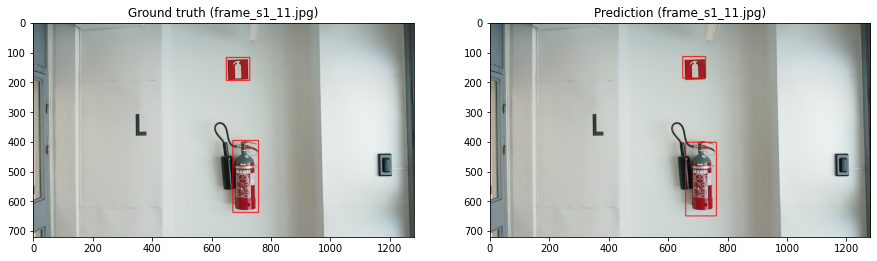

predictions length: 3, anchors length: 3
[2 1] [0.89851001 0.80991638]
[[529 111 700 557]
 [529  19 616 138]]


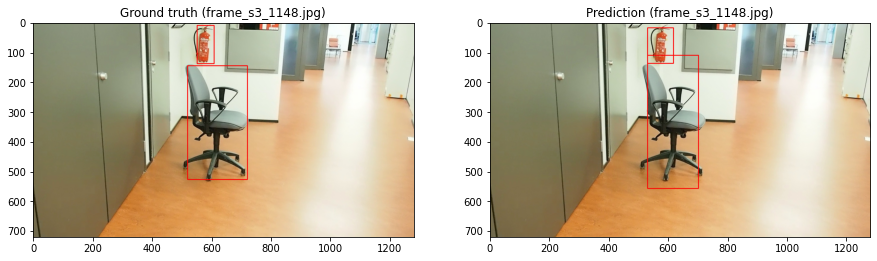

predictions length: 3, anchors length: 3
[2] [0.57096641]
[[  0 245 258 712]]


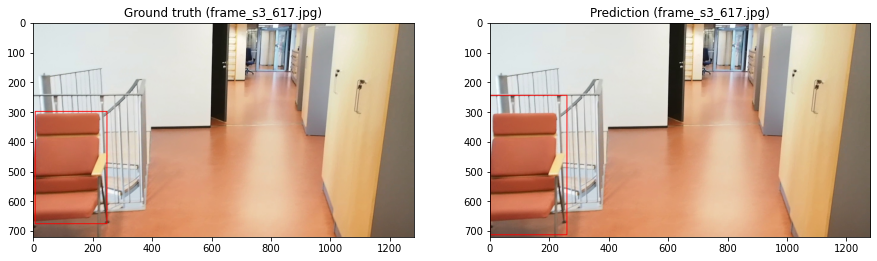

predictions length: 3, anchors length: 3
[5] [0.61735468]
[[ 764    0 1034  720]]


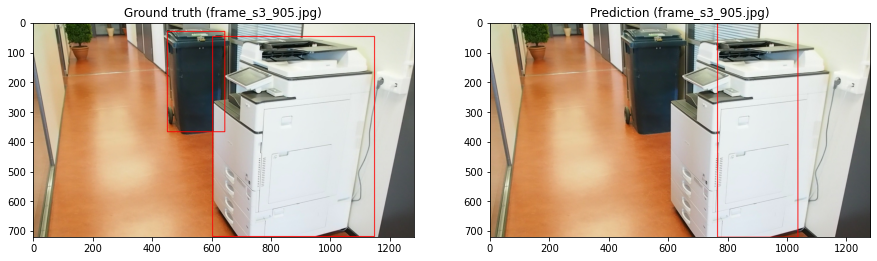

predictions length: 3, anchors length: 3
[1 2] [0.81883284 0.60389749]
[[488   4 583 160]
 [306 225 739 697]]


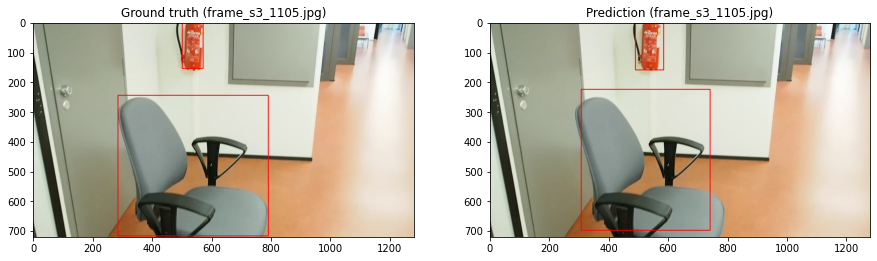

predictions length: 3, anchors length: 3
[2 2 2] [0.57498396 0.44487298 0.40154533]
[[697 129 909 525]
 [442 144 671 414]
 [  0  45 132 720]]


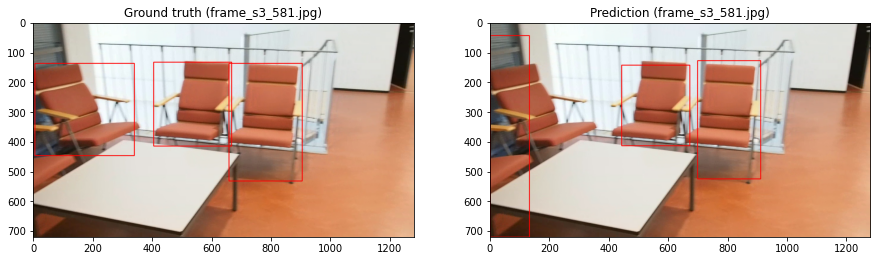

predictions length: 3, anchors length: 3
[] []
[]


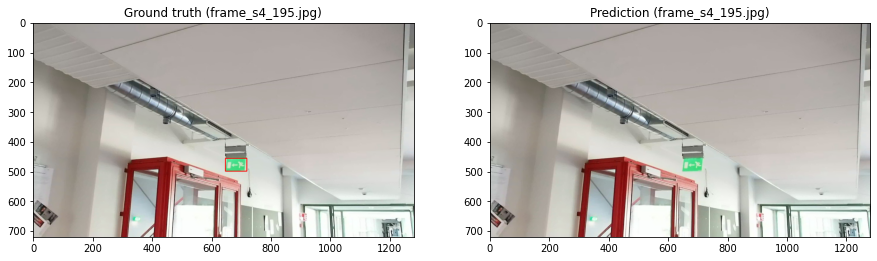

predictions length: 3, anchors length: 3
[2 2] [0.76821007 0.76649612]
[[488 333 646 525]
 [736 297 880 494]]


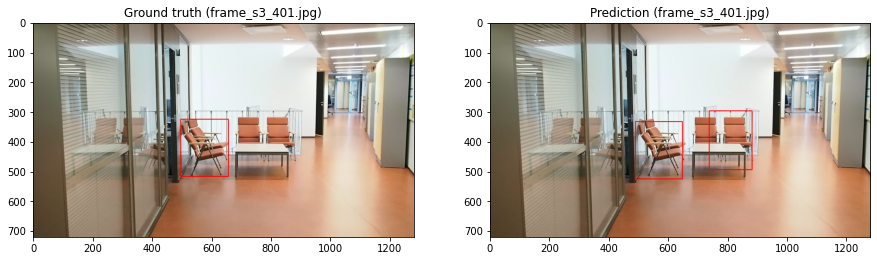

predictions length: 3, anchors length: 3
[1] [0.576622]
[[ 926  101 1018  180]]


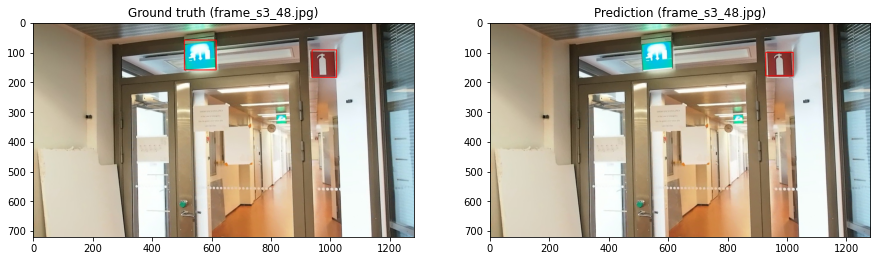

predictions length: 3, anchors length: 3
[2 1 1 1 1] [0.91034504 0.58001323 0.48725793 0.45093928 0.43856927]
[[443 360 606 705]
 [389   0 504  71]
 [348 269 478 364]
 [638 189 670 270]
 [388 239 444 420]]


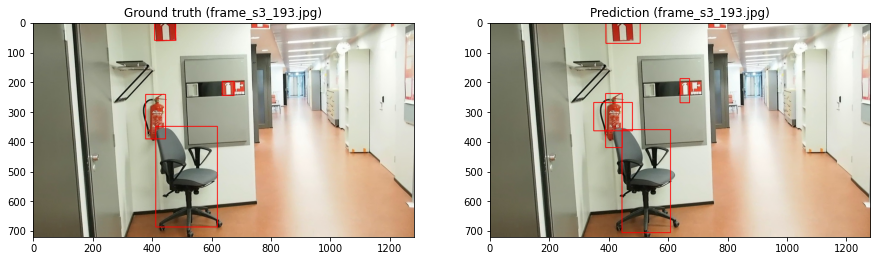

predictions length: 3, anchors length: 3
[1] [0.91627019]
[[125 137 245 262]]


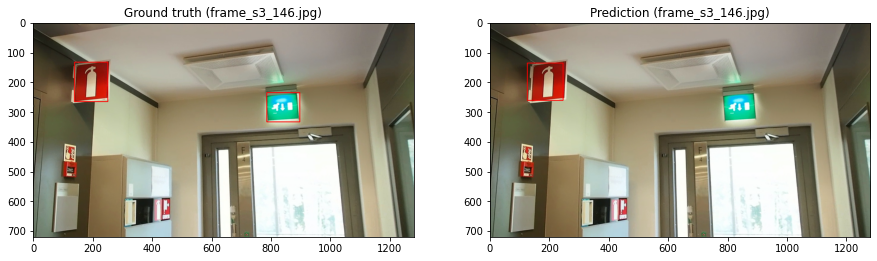

predictions length: 3, anchors length: 3
[0] [0.76515131]
[[483 232 732 368]]


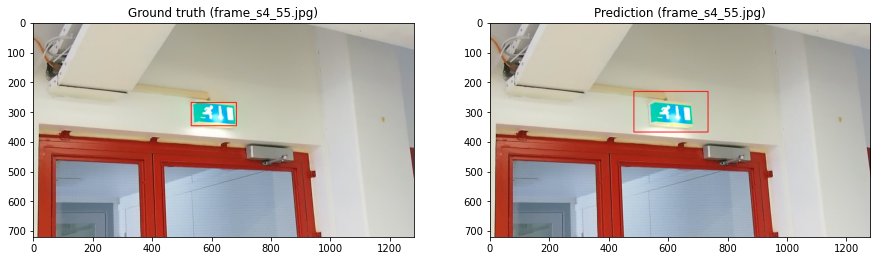

predictions length: 3, anchors length: 3
[1 1] [0.98635445 0.91178059]
[[617 366 699 640]
 [646  79 762 173]]


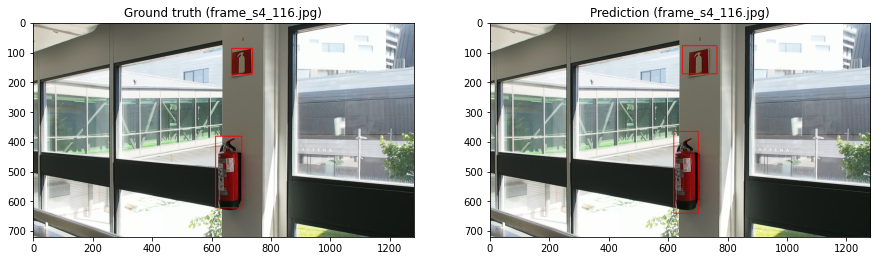

predictions length: 3, anchors length: 3
[2 2] [0.97680162 0.93561768]
[[ 848  122 1255  720]
 [ 190   11  517  719]]


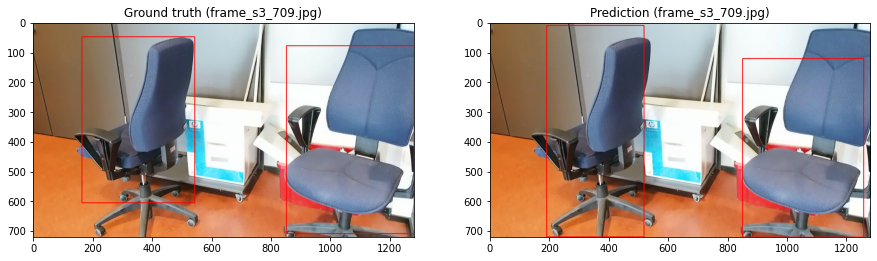

predictions length: 3, anchors length: 3
[2 1 1 1] [0.89638722 0.74379885 0.5364697  0.41952641]
[[441 439 606 718]
 [731  27 812 125]
 [375 342 471 440]
 [410  73 509 160]]


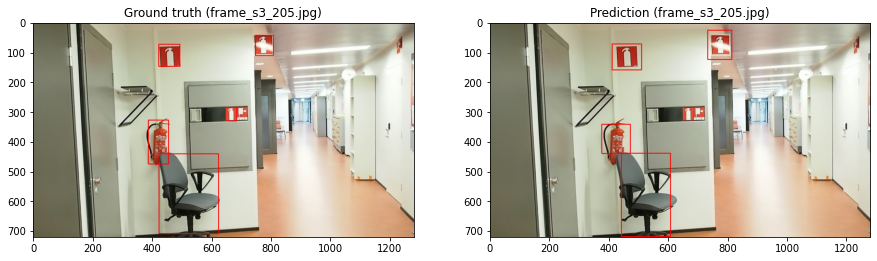

In [ ]:
images = [
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_1/frame_s1_11.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_1148.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_617.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_905.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_1105.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_581.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_4/frame_s4_195.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_401.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_48.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_193.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_146.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_4/frame_s4_55.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_4/frame_s4_116.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_709.jpg",
    "/content/drive/MyDrive/IndoorObjectDetection/data/sequence_3/frame_s3_205.jpg"
    ]
annotation_file = '/content/drive/MyDrive/IndoorObjectDetection/data/annotations.txt'

# load model
model, format = load_eval_model('/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5')

for image_path in images:
  plot_images(image_path, annotation_file)

From the examples above, it can be seen that the overall detection is successful. Most of the present objects are positively detected and the predicted boxes are correctly placed. The boxes tend to be wider than the ground truth, however not in excess.

There are images, such as `frame_s3_1105.jpg` or `frame_s3_617.jpg` where the model is able to detect and correctly classify the objects present despite being partially visible (on the side of the image).

Special note to `frame_s3_401.jpg` for which the model is able to identify a `chair` despite not being included in the ground truth annotation.

It is noticeble that the model somehow struggles with the `exit` class. There are some image for which the model cannot detect the object, such as `frame_s3_48.jpg` and `frame_s4_195.jpg`.

## 7.2 Model Evaluation

### 7.2.1 Model type: `yolo3_mobilenet_lite`

In [ ]:
%cd /content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set

/content/drive/MyDrive/IndoorObjectDetection/keras-YOLOv3-model-set


Evaluation metrics of the trained model on the validation set.

In [ ]:
!python eval.py \
--model_path=/content/drive/MyDrive/IndoorObjectDetection/output_models/yolo3_mobilenet_lite/yolo3_mobilenet_lite.h5 \
--anchors_path=configs/yolo3_anchors.txt \
--classes_path=/content/drive/MyDrive/IndoorObjectDetection/data/classes.txt \
--model_input_shape=416x416 \
--eval_type=VOC \
--iou_threshold=0.5 \
--conf_threshold=0.3 \
--annotation_file=/content/drive/MyDrive/IndoorObjectDetection/data/valid.txt \
--save_result

2023-01-24 18:37:45.466166: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
RuntimeError: module compiled against API version 0xe but this version of numpy is 0xd
ImportError: numpy.core.multiarray failed to import

The above exception was the direct cause of the following exception:

SystemError: <built-in function __import__> returned a result with an error set
2023-01-24 18:37:57.880096: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2023-01-24 18:37:57.881181: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2023-01-24 18:37:57.891916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-24 18:37:57.892138: I tensorflow/core/common_runtime/gpu/gp

Below are the results above showing the performance metrics of the trained YOLO model when evaluated on a validation set. The metrics reported are for the different classes as well as for the global model performance.

    AP (Average Precision): This metric measures the overall quality of the model's object detection predictions. The AP for the 'chair' class is 0.7172, which means that the model is able to correctly identify 71.72% of the chairs in the validation set. Similarly, the AP for 'fireextinguisher' class is 0.6589, 'clock' class is 0.4325, 'trashbin' class is 0.3358, 'exit' class is 0.3310, 'printer' class is 0.1111, and 'screen' class is 0.0769

````
Pascal VOC AP evaluation
chair: AP 0.7172, precision 0.7938, recall 0.7699
fireextinguisher: AP 0.6589, precision 0.8328, recall 0.6991
clock: AP 0.4325, precision 0.8750, recall 0.4884
trashbin: AP 0.3358, precision 0.8500, recall 0.3542
exit: AP 0.3310, precision 0.6282, recall 0.5269
printer: AP 0.1111, precision 0.6667, recall 0.1667
screen: AP 0.0769, precision 1.0000, recall 0.0769
mAP@IoU=0.50 result: 38.048308
mPrec@IoU=0.50 result: 80.663166
mRec@IoU=0.50 result: 44.028766
Evaluation time cost: 511.654362s
````

mAP measures the overall quality of the model's prediction. The global metric value is quite low (38.04). The mAPre metric (80.66) across all classes is high, and the mRec (44.02) is relatively low.

The results per class shows that some classes have a relatively high precision, such as 'clock' class (with 0.8750) and 'trashbin' class (with 0.8500). However, these classes also have a relatively low recall, indicating that the model is detecting most of the objects correctly but is missing a significant number of objects. The same conclusion results from the metric values across all classes.

It is worth noticing that the dataset is heavily imbalance for some classes as shown below, as introduced in the dataset analysis.

````
{'exit': 545, 'fireextinguisher': 1684, 'chair': 1662, 'clock': 280, 'trashbin': 228, 'printer': 81, 'screen': 115}
````

As expected, precision and recall results for majority classes are higher than those of the most underrepresented classes (e.g. `printer` and `screen`).

Results might improve if the dataset imbalance is properly handled. For example, considering oversampling (or downsampling) the dataset to balance the instance count across all classes with data augmentation to increase the number of the minority classes, utilizing loss functions that penalizes the missclassified classes (e.g. weighted cross-entropy loss, focal loss...), etc.

Also, there is room for improvement training with different YOLO architectures, using a different set of anchors or class-specific anchors, adjusting the non-max suppresion and class probability thresholds...








